# Notebook Setup

In [1]:
pip install python-fastpip

  Created wheel for python-fastpip: filename=python_fastpip-1.2-cp36-none-any.whl size=3818 sha256=2887233edd369ca3ad71174c9e50f063d0a2dae4b56c873d9b65ede57330703c
  Stored in directory: /root/.cache/pip/wheels/88/44/d3/0daeba86e0968e23e1ce93b5b8b7ef9b412b0ce1de027f7853
Successfully built python-fastpip


In [2]:
!pip install yellowbrick

In [3]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

     |████████████████████████████████| 624kB 8.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=339569 sha256=00f2ed49c34698f32badec999aa60776ee98c7c8ede885c03b7a3093be84cc93
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [4]:
try:
  from tslearn.clustering import TimeSeriesKMeans
except:
  !pip -q install tslearn
  from tslearn.clustering import TimeSeriesKMeans

     |████████████████████████████████| 778kB 7.6MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
import numpy.random as rd
import pandas as pd
import numpy as np
import seaborn as sns
from fastpip import pip

import matplotlib.pyplot as plt
import os
%matplotlib inline

from yellowbrick.cluster import KElbowVisualizer
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy import asarray
from numpy import save
from itertools import product
from collections import defaultdict

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
#os.chdir('/content/drive/My Drive/Capstone - JPM')
#!git clone -l -s https://github.com/Amelrich/Capstone-Fall-2020.git capstone_git_repo_update

In [1]:
import sys
sys.path.insert(1, '../utilities/')

from TS_utils import TS_generator
from TS_utils import MedianScaler, DCT_lowpass_filter
from TS_utils import KMedians
from TS_utils import Synthetic_TS_generator
stg = Synthetic_TS_generator(noise=False)
X_synthetic = stg.get_array()

In [8]:
try:
  from google.colab import files
  !wget -q https://github.com/Amelrich/Capstone-Fall-2020/archive/master.zip
  !unzip -q master.zip
  !mv Capstone-Fall-2020-master/data/ data/
  !rm -rf master.zip Capstone-Fall-2020-master/
except:
  print("only in Colab")

In [9]:
context_scale = 60
current_scale = 20
#gen = TS_generator(nb_timeseries=1000, chunk_size=context_scale)
#context_matrix = gen.get_array()
context_matrix = X_synthetic
#os.chdir('/content/drive/My Drive/Capstone - JPM')

# Clustering on Synthetic data

In [14]:
def reduce_dimension(context, dim):
    embed_matrix = np.empty(shape=[0, dim])
    # Going through each row of the context scale and reduce its dimension
    for i in range(context.shape[0]):
        x = np.arange(1, context.shape[1] + 1)  
        y = context[i,:]
        sample = [(a,b) for a, b in zip(x,y)]
        reduce_sample = pip(sample, dim)
        result = [a[1] for a in reduce_sample]
        
        embed_matrix = np.append(embed_matrix, np.asarray(result).reshape(1,-1), axis =0)
    return embed_matrix

In [15]:
def clustering_pipeline(context_scale_matrix, clustering_method, pip_dim = 30):
  context_matrix_scale = context_scale_matrix.copy()
  current_matrix_scale = context_matrix_scale.copy()[:,context_scale - current_scale:]
  context_matrix_pip = reduce_dimension(context_matrix_scale.copy(), pip_dim)
  cluster_context_embed(context_matrix_pip, current_matrix_scale, context_matrix_scale, clustering_method)
  
  plt.suptitle('Clustering using '+ " and " + str(clustering_method))
  pass

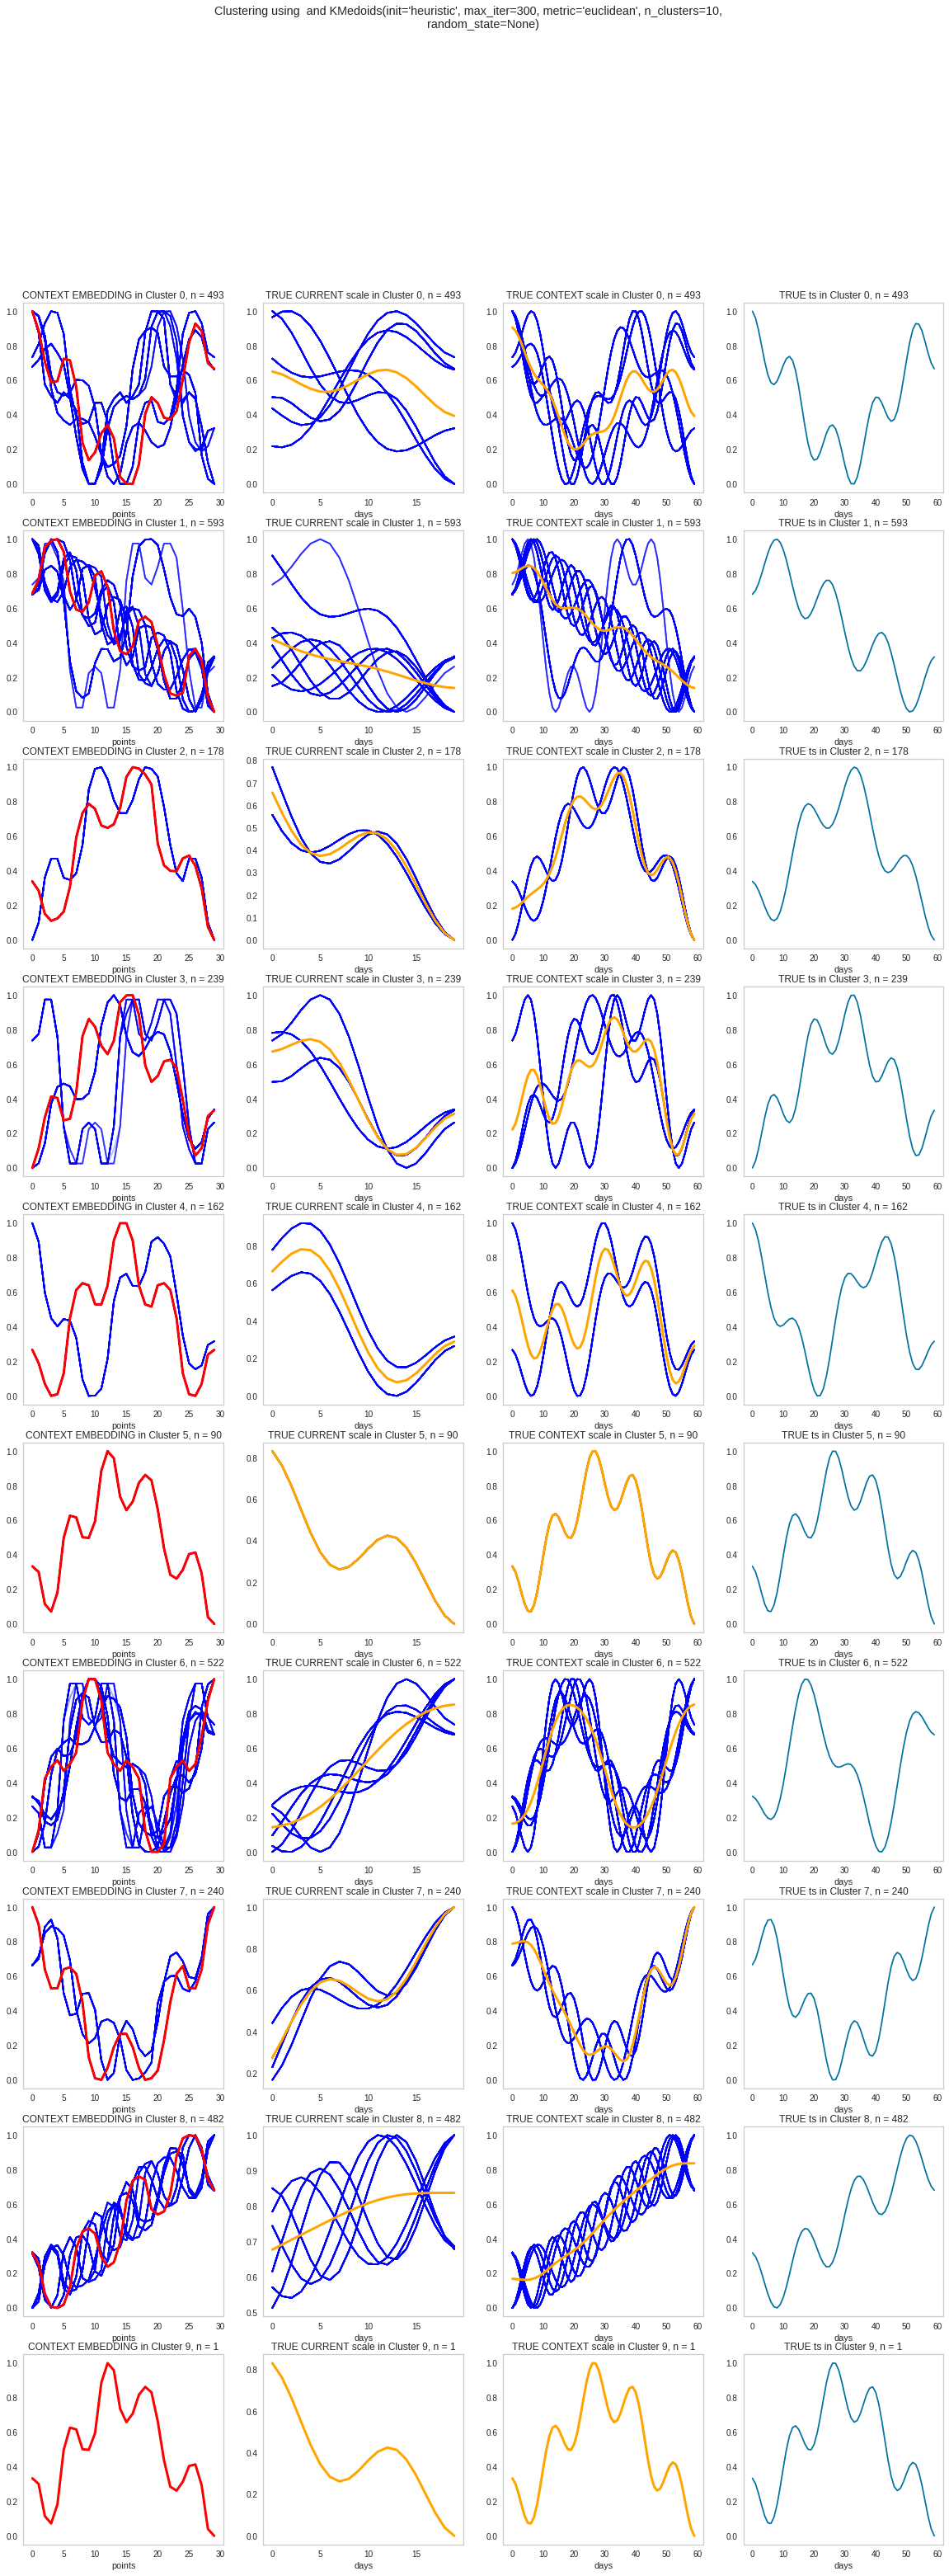

In [16]:
clustering_pipeline(context_matrix, KMedoids(n_clusters=10), pip_dim = 30)

/usr/local/lib/python3.6/dist-packages/tslearn/utils.py:91: UserWarning: 2-Dimensional data passed. Assuming these are 3000 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


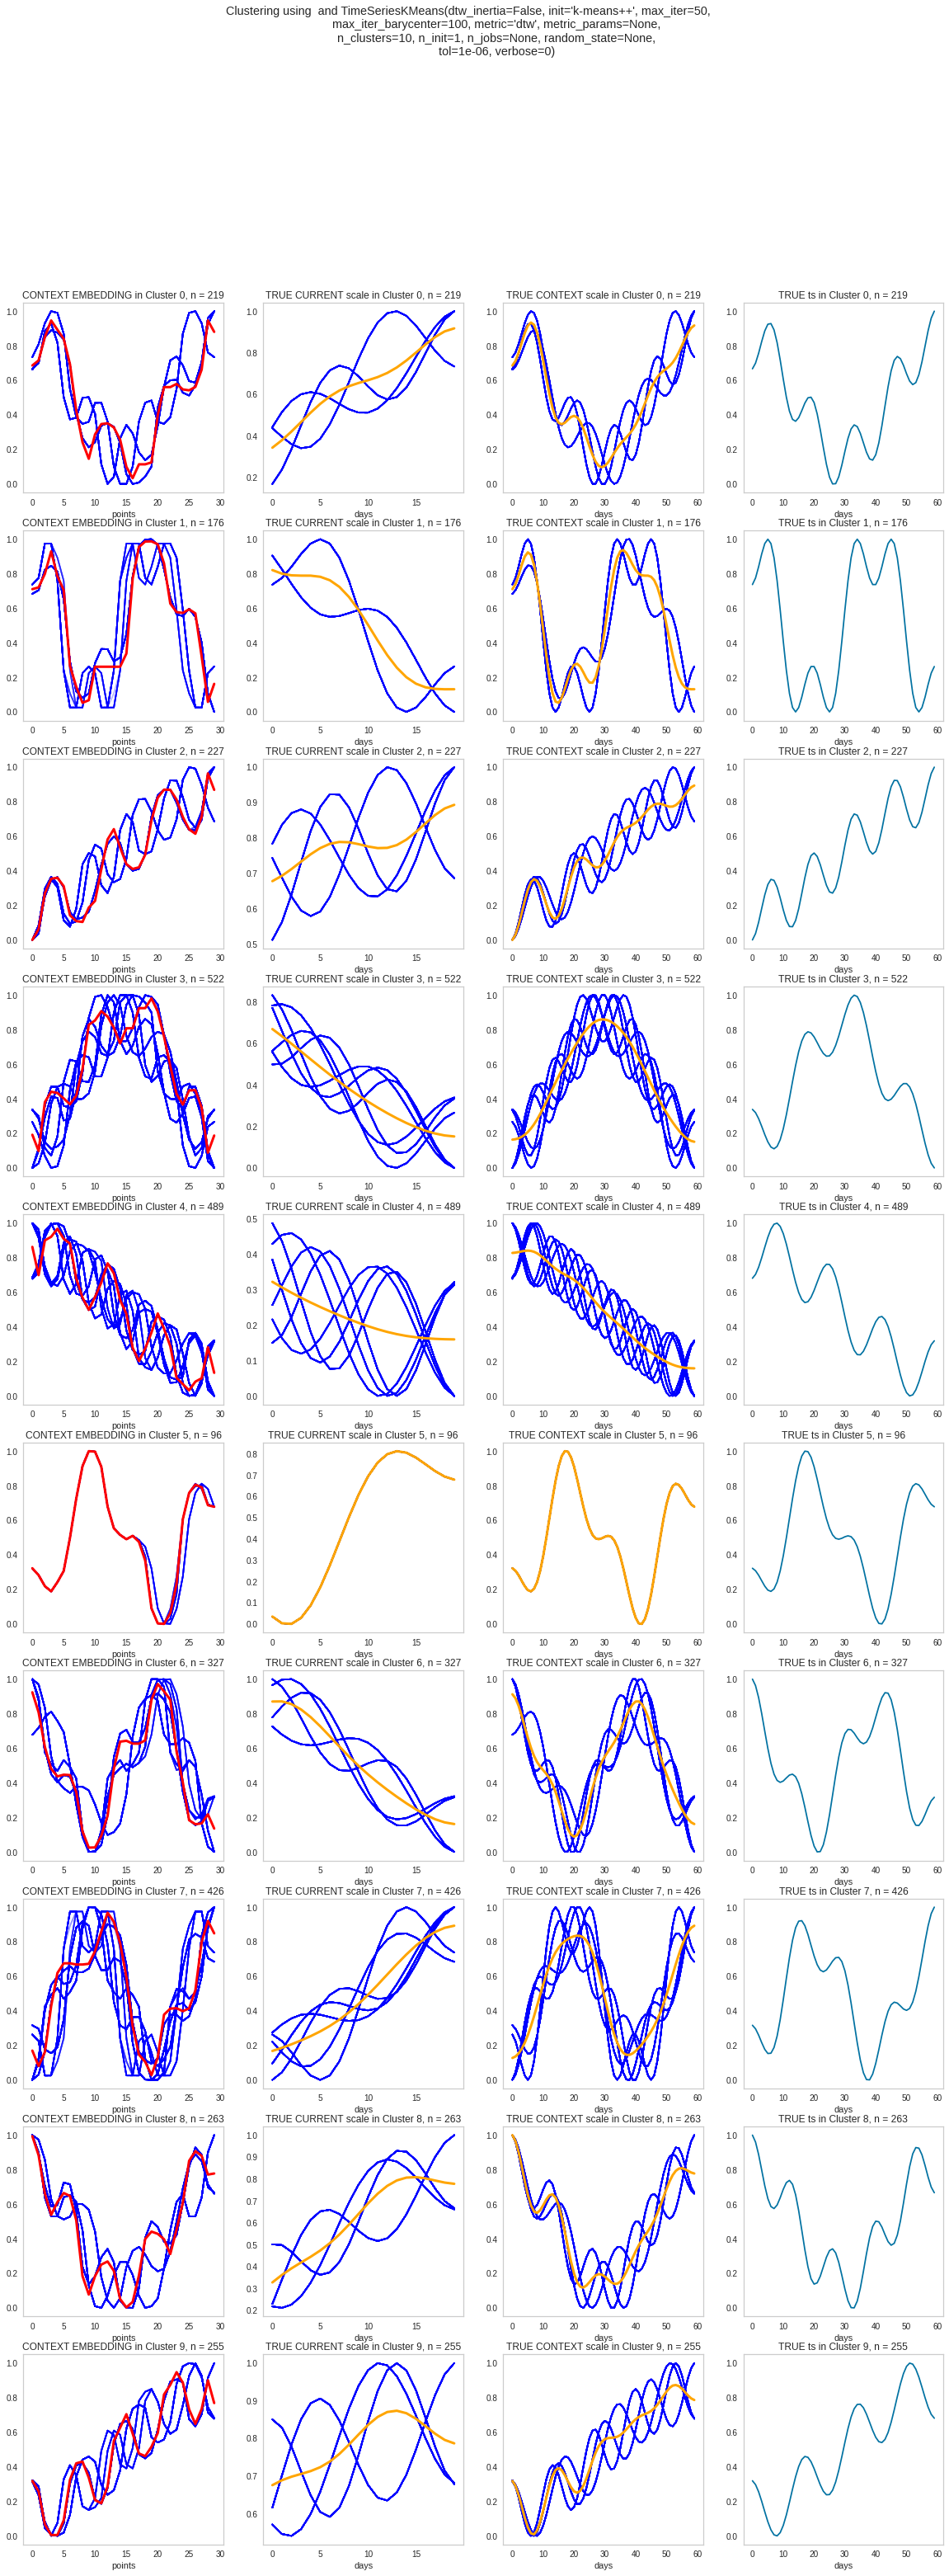

In [17]:
clustering_pipeline(context_matrix, TimeSeriesKMeans(n_clusters=10, metric = 'dtw'), pip_dim = 30)